In [21]:
pip install MetaTrader5

Note: you may need to restart the kernel to use updated packages.


In [22]:
pip install --upgrade MetaTrader5

Note: you may need to restart the kernel to use updated packages.


In [23]:
pip install -U numpy

In [24]:
import MetaTrader5 as mt5
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
from datetime import datetime
import time
import numpy as np


In [25]:
mt5.initialize()

True

In [26]:
symbolstotal = mt5.symbols_total()

In [27]:
if symbolstotal > 0:
    print('Total de Simbolos: ', symbolstotal)
else:
    print('Simbolos não encontrados')

Total de Simbolos:  104


In [28]:
symbols = mt5.symbols_get()
count = 0

In [29]:
for s in symbols:
    count +=1
    print("{}. {}".format(count, s.name))
    if count ==100: break
print()

1. EURUSD
2. GBPUSD
3. USDCHF
4. USDJPY
5. USDCNH
6. USDRUB
7. AUDUSD
8. NZDUSD
9. USDCAD
10. USDSEK
11. USDHKD
12. USDSGD
13. USDNOK
14. USDDKK
15. USDTRY
16. USDZAR
17. USDCZK
18. USDHUF
19. USDPLN
20. USDRUR
21. AUDCAD
22. AUDCHF
23. AUDJPY
24. AUDNZD
25. CADCHF
26. CADJPY
27. CHFJPY
28. EURAUD
29. EURCAD
30. EURCHF
31. EURCZK
32. EURDKK
33. EURGBP
34. EURHKD
35. EURHUF
36. EURJPY
37. EURNOK
38. EURNZD
39. EURPLN
40. EURRUR
41. EURRUB
42. EURSEK
43. EURTRY
44. EURZAR
45. GBPAUD
46. GBPCHF
47. GBPJPY
48. XAUUSD
49. XAUEUR
50. XAUAUD
51. XAGUSD
52. XAGEUR
53. GBPCAD
54. GBPNOK
55. GBPNZD
56. GBPPLN
57. GBPSEK
58. GBPSGD
59. GBPZAR
60. NZDCAD
61. NZDCHF
62. NZDJPY
63. NZDSGD
64. SGDJPY
65. XPDUSD
66. XPTUSD
67. USDGEL
68. USDMXN
69. EURMXN
70. GBPMXN
71. CADMXN
72. CHFMXN
73. MXNJPY
74. NZDMXN
75. USDCOP
76. USDARS
77. USDCLP
78. AUS200
79. FCHI40
80. GDAXIm
81. HSI50
82. ND100m
83. NI225
84. SP500m
85. SPN35
86. STOX50
87. UK100
88. Brent
89. Crude
90. NatGas
91. BRENT_V0
92. WTI_U0
9

In [30]:
symbols = ['EURUSD', 'GBPUSD', 'USDCHF']

In [31]:
data = pd.DataFrame()

In [32]:
for i in symbols:
    rates = mt5.copy_rates_from_pos(i, mt5.TIMEFRAME_M1, 0, 200)
    data[i] = [y['close'] for y in rates]

In [33]:
print(data)

      EURUSD   GBPUSD   USDCHF
0    1.02421  1.20292  0.96854
1    1.02434  1.20289  0.96864
2    1.02445  1.20272  0.96860
3    1.02430  1.20279  0.96844
4    1.02441  1.20276  0.96855
..       ...      ...      ...
195  1.01923  1.19699  0.97047
196  1.01937  1.19680  0.97059
197  1.01932  1.19703  0.97042
198  1.01931  1.19692  0.97043
199  1.01917  1.19684  0.97048

[200 rows x 3 columns]


<AxesSubplot:>

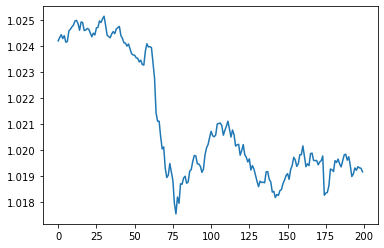

In [34]:
data['EURUSD'].plot()

In [35]:
def get_ohlc(ativo, timeframe, n=5):
    ativo = mt5.copy_rates_from_pos(ativo,timeframe, 0, n)
    ativo = pd.DataFrame(ativo)
    ativo['time'] = pd.to_datetime(ativo['time'], unit='s')
    ativo['Pivot'] = (ativo['high'] + ativo['low'] + ativo['close'])/3
    ativo['R1'] = 2*ativo['Pivot'] - ativo['low']
    ativo['S1'] = 2*ativo['Pivot'] - ativo['high']
    ativo['R2'] = ativo['Pivot'] + (ativo['high'] - ativo['low'])
    ativo['S2'] = ativo['Pivot'] - (ativo['high'] - ativo['low'])
    ativo['R3'] = ativo['Pivot'] + 2*(ativo['high'] - ativo['low'])
    ativo['S3'] = ativo['Pivot'] - 2*(ativo['high'] - ativo['low'])

    
    ativo.set_index('time', inplace = True)
    return ativo

In [36]:
ativo = (get_ohlc('EURUSD', mt5.TIMEFRAME_M5))

In [37]:
#verifica se está calculando 
ativo

,open,high,low,close,tick_volume,spread,real_volume,Pivot,R1,S1,R2,S2,R3,S3
time,,,,,,,,,,,,,,
2022-07-20 15:25:00,1.01835,1.01949,1.01824,1.01918,885,0,0,1.018970,1.019700,1.018450,1.020220,1.017720,1.021470,1.016470
2022-07-20 15:30:00,1.01917,1.01983,1.01901,1.01936,888,0,0,1.019400,1.019790,1.018970,1.020220,1.018580,1.021040,1.017760
2022-07-20 15:35:00,1.01936,1.01998,1.01936,1.01975,686,0,0,1.019697,1.020033,1.019413,1.020317,1.019077,1.020937,1.018457
2022-07-20 15:40:00,1.01975,1.01978,1.01876,1.01923,765,0,0,1.019257,1.019753,1.018733,1.020277,1.018237,1.021297,1.017217
2022-07-20 15:45:00,1.01923,1.01955,1.01907,1.01918,419,0,0,1.019267,1.019463,1.018983,1.019747,1.018787,1.020227,1.018307


In [38]:
#testando se o ativo é valido 
symbol = 'EURUSD'
symbol_info = mt5.symbol_info(symbol)
if symbol_info is None:
    print(symbol, "Não encontrato")
    mt5.shutdown()
    quit()

In [39]:
#preparando a ordem compra request  e ordem de venda

#########################################################
#preparando a ordem 
lot = 1.0
point = mt5.symbol_info(symbol).point
price = mt5.symbol_info_tick(symbol).ask
desviation = 1
request = {
    "action": mt5.TRADE_ACTION_DEAL,
    "symbol": symbol,
    "volume": lot,
    "type": mt5.ORDER_TYPE_BUY,
    "price": price,
    "magic": 234000,
    "desviation": desviation,
    "comment": "prython script open",
    "type_time":mt5.ORDER_TIME_GTC,
    'type_filling':mt5.ORDER_FILLING_RETURN,
    
          }

In [40]:
#preparando a ordem de venda 
lot = 1.0
point = mt5.symbol_info(symbol).point
price=mt5.symbol_info_tick(symbol).bid
desviation = 1
request2={
    "action": mt5.TRADE_ACTION_DEAL,
    "symbol": symbol,
    "volume": lot,
    "type": mt5.ORDER_TYPE_SELL,
    "price": price,
    
    "deviation": desviation,
    "magic": 234000,
    "comment": "python script close",
    "type_time": mt5.ORDER_TIME_GTC,
    "type_filling": mt5.ORDER_FILLING_RETURN,
}

In [41]:
#ENVIO de Ordem buy, APENAS UM TESTE PARA SABER SE A COMUNICAÇÃO ENTRE PYTHON E MT5 ESTÁ CORRETA...
result = mt5.order_send(request)
#verificando a resultado da execulção 
print(f'1. Ordem enviada:{lot} de {symbol} ao preço de {price} com desvio de {desviation}',end  = '\r')


In [44]:
# EXECULÇÃO DO BOT PIVOTPOINT 
# ANTES DE EXECUTAR ESSA CELULA CERTIFIQUE QUE NENHUMA ORDEM ESTEJA ABERTA.

tempo = time.time() + 18000
while time.time() < tempo:
    ativo = (get_ohlc('EURUSD', mt5.TIMEFRAME_M5))
    tick = mt5.symbol_info_tick('EURUSD')
    print (f'EURUSD - ultimo valor: {tick.last}, Topo do Book C: {tick.bid},Topo do Book V: {tick.ask}', tick.last>ativo['Pivot'][-1 -1], end  = '\r')
    if tick.last> ativo['Pivot'][-1 -1]:
        if mt5.positions_get(symbol="EURUSD") == () or mt5.positions_get(symbol="EURUSD")[0][5] == 1:
            #enviadno ordem de compra 
            result = mt5.order_send(request)
            print(f'1. Ordem COMPRA enviada:{lot} de {symbol} ao preço de {price} com desvio de {desviation}',end  = '\r')

    if tick.last <ativo['S1'][-1 -1]:
        
        if mt5.positions_get(symbol="EURUSD") == () or mt5.positions_get(symbol="EURUSD")[0][5] == 0:
            #enviadno ordem de venda 
            result = mt5.order_send(request2)
        #verificando a resultado da execulção 
            print(f'1. Ordem VENDA enviada: {lot} de {symbol} ao preço de {price} com desvio de {desviation}',end  = '\r')
        
    time.sleep(0.10)

KeyError: 'time'